In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-kannada/language-model')

In [6]:
p = path.glob('KannadaWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [7]:
len(files)

32997

In [13]:
train_files, test_files = train_test_split(files, test_size=0.2)

In [14]:
len(train_files), len(test_files)

(26397, 6600)

In [15]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-kannada/language-model/KannadaWikipediaArticles/19779.pkl')

In [17]:
str(train_files[0]).split('/')[-1][:-4]

'19779'

In [19]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'KannadaDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [20]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'KannadaDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [6]:
from inltk.tokenizer import KannadaTokenizer

In [7]:
KannadaTokenizer

inltk.tokenizer.KannadaTokenizer

In [8]:
# class KannadaTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/kannada_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/kannada_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(25000)]

In [33]:
itos

['<unk>',
 '<s>',
 '</s>',
 '.',
 ',',
 '▁',
 '▁ಮತ್ತು',
 'ದ',
 '▁ಈ',
 'ಗಳು',
 'ಯ',
 'ಗಳ',
 'ಗಳನ್ನು',
 'ರ',
 '▁ಒಂದು',
 'ವನ್ನು',
 '-',
 'ವು',
 'ನ',
 'ರು',
 '▁ನ',
 '▁ಹಾಗೂ',
 'ು',
 'ದಲ್ಲಿ',
 'ಕ್ಕೆ',
 'ಯನ್ನು',
 'ಗೆ',
 'ಸ್',
 '▁ಎಂದು',
 '▁ಅಥವಾ',
 'ಗಳಲ್ಲಿ',
 '▁ಇದು',
 'ರಲ್ಲಿ',
 '▁"',
 'ಿ',
 '"',
 '▁ಅವರು',
 "'",
 '▁ಎಂಬ',
 '▁ಆ',
 'ವಾಗಿ',
 'ಯು',
 '್',
 '▁ಅವರ',
 "▁'",
 '▁ಮೇಲೆ',
 'X',
 '▁�',
 'ವಾದ',
 '▁q',
 'ದಿಂದ',
 'ಗಳಿಗೆ',
 'ಯಲ್ಲಿ',
 'ಲು',
 '▁ತಮ್ಮ',
 '▁ತನ್ನ',
 ':',
 '▁ನಲ್ಲಿ',
 'ನ್ನು',
 'ನ್',
 'ಾ',
 '▁ನಂತರ',
 'ಲ್ಲಿ',
 '▁ಆದರೆ',
 'ಕ',
 '▁ಹೆಚ್ಚು',
 '▁ಮೂಲಕ',
 '▁ಅ',
 'ರ್',
 'ಲ್',
 ';',
 'ಗಳಿಂದ',
 'ುವ',
 '▁ಕೆಲವು',
 'ನು',
 'ಟ್',
 'ವ',
 '▁ಪ್ರಮುಖ',
 '▁ಅನೇಕ',
 '▁ರ',
 '▁ರಲ್ಲಿ',
 'ವಾಗಿದೆ',
 'ಯಿಂದ',
 'ಸಿ',
 '▁ಸುಮಾರು',
 'ಕ್',
 '▁ಎರಡು',
 '▁-',
 '▁ಇದರ',
 'ೆ',
 '▁ಮೊದಲ',
 '▁ಅದರ',
 'ಡ್',
 'ಸ',
 '�',
 'ುತ್ತದೆ',
 '▁ಇದನ್ನು',
 '▁ಹಾಗು',
 'ಾಗ',
 'ದೆ',
 'ಿತು',
 'ಲ',
 '▁ಇತರ',
 'ಿಂದ',
 'ಲಿ',
 'ರಿ',
 '/',
 'ಂ',
 'ಮ್',
 'ರೆ',
 '▁ಕನ್ನಡ',
 '▁ಅದು',
 '▁ಬಗ್ಗೆ',
 'ಯೂ',
 '▁ಅತ್ಯಂತ',
 '▁ಸಹ',
 'ಿಗೆ',
 'ವಿ',
 '▁·',
 '▁ಸಾಮಾನ್ಯವಾಗಿ',
 '▁ಹೆಚ

In [11]:
# 25,000 is the vocab size that we chose in sentencepiece
kannada_vocab = Vocab(itos)

In [12]:
tokenizer = Tokenizer(tok_func=KannadaTokenizer, lang='kn')

In [13]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [14]:
data_lm = TextLMDataBunch.from_folder(path=path/'KannadaDataset', tokenizer=tokenizer, vocab=kannada_vocab)

In [15]:
data_lm.batch_size

64

In [16]:
data_lm.save()

In [40]:
data_lm.show_batch()

idx,text
0,"▁x x b os ▁ಜಲಾನಯನ ▁ಪ್ರದೇಶವು ▁ಅವ ಕ್ಷೇಪ ನ ▁ಸಂಗ್ರಹ ಗೊಂಡು ▁ನದಿ , ▁ಕೊಲ್ಲಿ , ▁ಅಥವಾ ▁ಬೇರೆ ▁ಜಲ ಸಮೂಹ ದಂತಹ ▁ಸಾಮಾನ್ಯ ▁ಹೊರ ಗುಂಡಿ ಯೊಳಗೆ ▁ಹರಿದು ▁ಹೋಗುವ ▁ಯಾವುದೇ ▁ಭೂಪ್ರದೇಶ . ▁ಜಲಾನಯನ ▁ಪ್ರದೇಶವು ▁ಹಂಚಿಕೊಂಡ ▁ಹೊರ ಗುಂಡಿ ಯ ▁ಕಡೆಗೆ ▁ಇಳಿಜಾರ ಿನಲ್ಲಿ ▁ಚಲಿಸುವ ▁ಹರಿದು ▁ಹೋಗುವ ▁ಮಳೆ ನೀರು , ▁ಹಿಮ ಕರ ಗ ುವಿಕೆ , ▁ಮತ್ತು ▁ಹತ್ತಿರದ ▁ಹೊಳೆ ಗಳಿಂದ ▁ಮೇಲ್ಮೈ ▁ನೀರನ್ನು , ▁ಜೊತೆಗೆ ▁ಭೂಮಿಯ ▁ಮೇಲ್ಮೈ ▁ಕೆಳಗಿನ ▁ಅಂತರ್ಜಲ ವನ್ನು ▁ಒಳಗೊಂಡಿರುತ್ತದೆ . ▁ಜಲಾನಯನ ▁ಪ್ರದೇಶಗಳು ▁ಕ್ರಮಾನುಗತ ▁ಮಾದರಿಯಲ್ಲಿ ▁ಕಡಿಮೆ ▁ಎತ್ತರದಲ್ಲಿ"
1,"▁ಕಾ ವಿ , ▁ರುದ್ರಾಕ್ಷಿ ಗಳನ್ನು ▁ಧರಿಸಿದ ▁ಸನ್ಯಾಸಿ ಯಾಗಿ ▁ , ಸನ್ ಯಾ ಸ ತ್ವ ▁ಸ್ವೀಕಾರ ದ ▁ನಂತರವೂ ▁ವಿದ್ಯಾಭ್ಯಾಸ ▁ಮುಂದುವರಿಸಿದ ▁ಶಿವ ಣ್ಣನವರ ು ▁ಬೆಂಗಳೂರಿಗೆ ▁ಬಂದು ▁ಸನ್ಯಾಸ ತ್ವದ ▁ರೀತಿ ▁ರಿ ವಾ ಜು ▁ಪಾಲಿಸ ುತ್ತಾ ▁ವಿದ್ಯಾಭ್ಯಾಸ ▁ಮುಗಿಸಿ ▁ಪ್ರಥಮ ▁ದರ್ಜೆಯ ಲ್ಲಿ ▁ತೇರ್ಗಡೆ ಯಾಗಿ ▁ಸಿದ್ದ ಗಂಗಾ ▁ಮಠ ಕ್ಕೆ ▁ಹಿಂದಿರುಗಿದರು , ▁ನಂತರ ▁ತಮ್ಮ ▁ಪೂರ್ಣ ▁ಸಮಯವನ್ನು ▁ಮಠದ ▁ಏಳಿಗೆ ಗಾಗಿ ▁ಮೀಸಲಿಡ ುತ್ತಾರೆ . ▁ನಂತರ ▁ಶ್ರೀ ▁ಉದ್ ಧಾನ ▁ಶಿವಯೋಗಿ ಗಳು ▁ಶಿವ ೈಕ್ಯ ರಾದ ಾಗ ▁ಮಠದ ▁ಸಕಲ ▁ಆಡಳಿತ , ▁ಮಠದ"
2,"ಇದರಲ್ಲಿ ▁ಪ್ರಮುಖವಾಗಿ ▁ಚಿಂತೆ ಗೀ ಡು ▁ಮಾಡುವ ▁ಸಂಗತಿಯೆಂದರೆ ▁ಸರ್ಕಾರದ ▁ನಿರ್ಧಾರಗಳನ್ನು ▁ಮಾಡಲು ▁ಮತ್ತು ▁ಕೇಂದ್ರ ▁ಕ್ಯಾಬಿನೆಟ್ ▁ಮಂತ್ರಿ ಗಳನ್ನು ▁ಆಯ್ಕೆ ▁ಮಾಡುವ ಂತಹ ▁ಅತ್ಯಂತ ▁ಮಹತ್ವದ ▁ಸಂಗತಿ ಗಳಲ್ಲಿ ▁ಮಾಧ್ಯಮದ ವರನ್ನು ▁ಬಳಸಿಕೊಂಡ ಿದ್ದು ▁ , "" ▁ಎಂದು ▁ತನ್ನ ▁ಹೇಳಿಕೆ ಯಲ್ಲಿ ▁ಈ ▁ಆಯೋಗದ ▁ಭಾರತೀಯ ▁ವಿಭಾಗ ▁ಹೇಳಿದೆ . ▁ಭಾರತೀಯ ▁ಸರ್ವೋಚ್ಛ ▁ನ್ಯಾಯಾಲಯದಲ್ಲಿ ▁೮ನೇ ▁ಜನವರಿ ▁೨೦೧೧ ▁ರಂದು ▁ಸಲ್ಲಿಸಿದ ▁ಅ ಫಿ ಡ ವಿ ಟ್ ▁ನಲ್ಲಿ ▁ರತನ್ ▁ಟಾಟಾ ▁ಅವರು , ▁ತಾವು ▁ಡಿಸೆಂಬರ್ ▁೨೦೧೦ ▁ರಲ್ಲಿ ▁ಸಲ್ಲಿಸಿದ ▁ರಿ ಟ್ ▁ಅರ್ಜಿ ಯ ▁ಉದ್ದೇಶ ▁ಕೇವಲ ▁ತಮ್ಮ ▁ಮತ್ತು"
3,▁ಸಾಹಿತ್ಯ ▁ಶಿಶು ಗಳಿಗೆ ▁ಅವಕಾಶ ವೇ ▁ಇರುವುದಿಲ್ಲ . ▁ಆ ▁ನಿಟ್ಟಿನಲ್ಲಿ ▁ ಉಡುಪ ರ ▁ತತ್ವ ▁ಇದು : ▁ಹುಟ್ಟುವ ಾಗಲೇ ▁ಒಬ್ಬ ▁ಸಾಹಿತಿ ಯಾಗಿ ಯೇ ▁ಹುಟ್ಟ ಲಾರ . ▁ಅದಕ್ಕೆ ▁ಅವಕಾಶ ▁ಸಿಗ ದಿದ್ದರೆ ▁ಒಬ್ಬ ▁ಹೊಸ ಬ ನು ▁ಸಾಹಿತಿ ಯಾಗಿ ▁ಬೆಳೆಯಲು ▁ಹೇಗೆ ▁ಸಾಧ್ಯ ? ▁ಇದು ▁ ಉಡುಪ ರ ▁ದೃಷ್ಟಿ . ▁ವರ್ಷಕ್ಕೊಮ್ಮೆ ▁ವಿಶೇಷ ಾಂಕ ▁ಹೊರ ▁ತರ ುತ್ತಿದ್ದರು . ▁ದಸರಾ ▁ದೀಪಾವಳಿ ▁ವಿಶೇಷ ಾಂಕ ▁ಎಂದು ▁ಹೊರ ▁ಬರುತ್ತಿದ್ದ ▁ಈ ▁ಸಂಚಿಕೆ ಯನ್ನು ▁ಪ್ರತಿ ▁ವರ್ಷ ▁ಒಂದೊಂದು ▁ವಿಷಯವನ್ನು ▁ಪ್ರಮುಖವಾಗಿ ಟ್ಟುಕೊಂಡು ▁ಆ ▁ವಿಷಯ ಕ್ಕೆ
4,ತಿಯ ರ ▁ಕುರುಹುಗಳು ▁ಇವೆಲ್ಲ ಕ್ಕೂ ▁ಕಿರೀಟ ವಿ ಟ್ಟ ಂತೆ ▁ಸುಂದರ ▁ನೆಲೆಯಲ್ಲಿ ▁ಶೋಭ ಿಸುತ್ತಿರುವ ▁ಮುರು ಡ ೇಶ್ವರ ▁ದೇವಾಲಯ ▁ಹಾಗೂ ▁ಹಳೆಯ ▁ದೇವಾಲಯಗಳ ▁ಅವಶೇಷ ಗಳನ್ನೆಲ್ಲ ▁ಕಾಣಬಹುದು . ▁ರಾಷ್ಟ್ರೀಯ ▁ಹೆದ್ದಾರಿ ಯಿಂದ ▁ಊರ ನ್ನು ▁ಪ್ರವೇಶಿಸುವ ಾಗ ▁ಮಹಾದ್ವಾರ ವು ▁ಕಲಾತ್ಮಕ ವಾಗಿದ್ದು ▁ದೇವಾಲಯದ ▁ಬಳಿ ಸಾರಿ ದಂತೆ ▁ಎರಡು ▁ಆನೆಗಳು ▁ಪ್ರವಾಸಿ ಕ ರನ್ನು ▁ಸ್ವಾಗತ ಿಸುವ ವು . ▁ಸಮುದ್ರದಲ್ಲಿ ▁ಒಳಸೇರ ಿದ ▁ಕಂದು ಗಿರಿ ▁ಎಂಬ ▁ಗುಡ್ಡದ ▁ಮೇಲೆ ▁ಮುರು ಡ ೇಶ್ವರ ನ ▁ದೇವಾಲಯವನ್ನು ▁ಹೊಸದಾಗಿ ▁ದ ಾಕ್ಷಿ ಣಾ ತ್ಯ ▁ಶಿಲ್ಪ ದಲ್ಲಿ ▁ನಿರ್ಮಿಸಲಾಗಿದೆ .


In [17]:
len(data_lm.vocab.itos)

25000

In [42]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '.': 3,
             ',': 4,
             '▁': 5,
             '▁ಮತ್ತು': 6,
             'ದ': 7,
             '▁ಈ': 8,
             'ಗಳು': 9,
             'ಯ': 10,
             'ಗಳ': 11,
             'ಗಳನ್ನು': 12,
             'ರ': 13,
             '▁ಒಂದು': 14,
             'ವನ್ನು': 15,
             '-': 16,
             'ವು': 17,
             'ನ': 18,
             'ರು': 19,
             '▁ನ': 20,
             '▁ಹಾಗೂ': 21,
             'ು': 22,
             'ದಲ್ಲಿ': 23,
             'ಕ್ಕೆ': 24,
             'ಯನ್ನು': 25,
             'ಗೆ': 26,
             'ಸ್': 27,
             '▁ಎಂದು': 28,
             '▁ಅಥವಾ': 29,
             'ಗಳಲ್ಲಿ': 30,
             '▁ಇದು': 31,
             'ರಲ್ಲಿ': 32,
             '▁"': 33,
             'ಿ': 34,
             '"': 35,
             '▁ಅವರು': 36,
             "'": 37,
             '▁ಎಂಬ': 38,
             '▁ಆ': 39,
             'ವಾಗಿ': 40,
        

In [18]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [19]:
gc.collect()

56

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


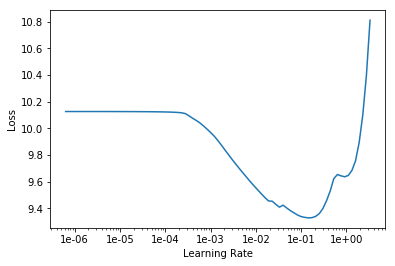

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.453883,5.350515,0.197037


In [48]:
learn.save('first', with_opt=True)

In [49]:
learn.load('first', with_opt=True);

In [50]:
learn.unfreeze()

In [51]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,5.291538,5.465673,0.185687
2,5.290400,5.412513,0.190511
3,5.073208,5.121542,0.219262
4,4.868716,4.811566,0.251095
5,4.539536,4.701652,0.265588


In [52]:
learn.save('second_kn_lm', with_opt=True)

In [53]:
learn.fit_one_cycle(40, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.432379,4.694982,0.266518
2,4.474477,4.687900,0.267549
3,4.497796,4.678734,0.268939
4,4.443062,4.667910,0.270631
5,4.292780,4.656073,0.272499
6,4.379364,4.643714,0.274579
7,4.523910,4.630581,0.276597
8,4.334581,4.615079,0.278937
9,4.308815,4.597715,0.281410
10,4.371534,4.580500,0.284047


In [20]:
learn.save('third_kn_lm', with_opt=True)

In [21]:
learn.load('third_kn_lm', with_opt=True);

In [22]:
TEXT = "ಚುನಾವಣೆ ಬಂತೆಂದರೆ"
N_WORDS = 40
N_SENTENCES = 2

In [23]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

ಚುನಾವಣೆ ಬಂತೆಂದರೆ ▁' ಸಂ ವಿಧಾನ ▁ಭಾರತಿ ' ▁ಎಂದು ▁ಬಿರುದ ಾಂಕ ಿತ ದ ▁ಒಂದು ▁ಸಭೆ ಯಾಗಿದೆ . ▁ . ▁ಈ ▁ಸಂಸ್ಥೆಯ ▁ಮುಖ್ಯ ▁ಕಾರ್ಯ ಸ್ಥಾನ ವೆಂದರೆ ▁ಒಬ್ಬ ▁ಶಾಸಕ ನು ▁ಪ್ರತಿ ▁ಮತ ವನ್ನು ▁ಇನ್ನೊಬ್ಬ ನನ್ನು ▁ಬರೆಯಲು ▁ಅರ್ಹ ನಾದ ವನು . ▁ಈ ▁ಕಾರ್ಯದರ್ಶಿಯಾಗಿ ▁ಆಯ್ಕೆಯಾದ ವನು ▁ಎಡಿನ್
ಚುನಾವಣೆ ಬಂತೆಂದರೆ ▁ಕೆ ಲ್ಲಿ , ▁ನಿರ್ದಿಷ್ಟವಾಗಿ ▁ಒಂದು ▁ಗುಂಪು . ▁ಅವರು ▁" ಗಾಯ ು " ▁ಮತ್ತು ▁" ಆರೋಗ್ಯ " ▁ಎಂಬ ▁ಪದಗಳನ್ನು ▁ಉಪಯೋಗಿಸ ುವುದು ▁ಇದರ ▁ಸ್ವಭಾವ . ▁ಒಂದು ▁ಸಂಸ್ಥೆಯ ೊಂದು ▁ಜಂಟಿಯಾಗಿ ▁ಒಂದು ▁ಕಾನೂನು ಗಳಿಗೆ ▁ಸಹಿ ▁ಮಾಡಬಹುದು . ▁ಪಂಚ ಮೀ ನ ▁ಈ ▁ವಿಶ್ವ ವು ▁ಮಂಡಳಿ


In [55]:
np.exp(4.25)

70.10541234668786

In [24]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [10]:
# Generating embedding vectors for visualization

In [11]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-kannada/language-model')

In [12]:
defaults.device = torch.device('cpu')

In [14]:
learn = load_learner(path / 'KannadaDataset/')

In [15]:
encoder = get_model(learn.model)[0]

In [16]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([25000, 400])

In [17]:
embeddings = encoder.state_dict()['encoder.weight']

In [18]:
embeddings = np.array(embeddings)

In [19]:
embeddings[0].shape

(400,)

In [20]:
df = pd.DataFrame(embeddings)

In [21]:
df.shape

(25000, 400)

In [22]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.783647,-0.669314,0.610807,0.249953,0.078275,0.042902,-0.872365,-0.823517,-0.604113,-0.393928,...,0.151129,1.422911,-0.126693,0.314597,-0.162962,0.120051,-0.433900,-0.554381,-0.029472,-0.347374
1,-0.161132,-0.025906,-0.090234,0.042355,-0.036935,0.248826,-0.490719,-0.089700,-0.136330,-0.245190,...,0.022539,0.684011,-0.201360,0.246198,0.201654,-0.244476,0.044601,-0.022362,0.081313,0.114844
2,-0.161809,-0.025662,-0.098065,0.042206,-0.029595,0.245221,-0.494439,-0.087720,-0.137726,-0.250022,...,0.022364,0.679052,-0.201303,0.248625,0.191546,-0.245938,0.044153,-0.022348,0.081505,0.118246
3,0.077389,0.033269,0.449118,0.970039,0.273002,-0.008465,-0.371778,-1.982160,-0.094612,-0.525720,...,0.056126,2.220028,0.178730,0.092102,0.097653,-0.493575,-0.221738,-0.468506,0.835921,-1.165815
4,0.411710,0.323292,0.161870,1.283061,0.021690,-1.257636,-0.058624,-1.557033,-0.075581,-0.410623,...,0.072712,1.259802,-0.303350,0.582963,-0.147118,-0.356185,-0.007906,-0.196417,-0.451219,-0.330519


In [24]:
df2 = pd.DataFrame(itos)

In [25]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,.
4,","


In [26]:
df2.shape

(25000, 1)

In [27]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [28]:
encoder.state_dict()['encoder.weight'][1]

tensor([-1.6113e-01, -2.5906e-02, -9.0234e-02,  4.2355e-02, -3.6935e-02,
         2.4883e-01, -4.9072e-01, -8.9700e-02, -1.3633e-01, -2.4519e-01,
         5.5302e-01, -1.9470e-01,  9.5223e-02, -4.0209e-01,  7.0847e-02,
         1.9529e-01, -2.7980e-01,  4.1857e-02, -1.4940e-01, -1.9991e-01,
         1.7958e-01,  9.9427e-02,  8.1952e-02, -3.2401e-01, -5.3641e-02,
        -1.2558e-01,  6.4718e-02, -9.5614e-02, -1.7094e-01,  6.6453e-02,
        -2.2405e-02, -2.3946e-02,  6.3574e-02, -1.3629e-01,  3.9300e-02,
        -3.5117e-01,  1.3452e-01, -7.8686e-02, -1.6828e-01,  3.2069e-01,
         3.8082e-02, -6.0802e-02,  1.9153e-02, -2.6765e-02,  8.4884e-02,
         1.4315e-02,  2.0316e-01,  3.3551e-01, -3.9510e-01,  2.8256e-02,
        -3.7229e-01,  4.3660e-02, -8.4160e-01,  3.5207e-01, -9.2387e-03,
         1.3131e-01,  2.2112e-02, -2.1665e-01,  5.0754e-02, -1.9039e-01,
         9.1907e-02,  6.1988e-02,  8.9648e-02,  9.1786e-02, -1.4169e-01,
         8.1634e-02,  1.5480e-02,  3.2160e-01, -1.6